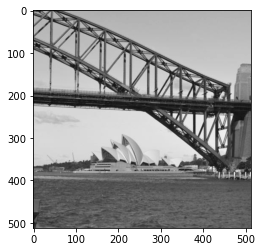

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = np.array(plt.imread("operahall.png"), dtype=float)
plt.imshow(f,cmap="gray")

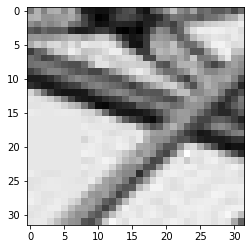

In [4]:
top_left = f[0:32, 0:32]
plt.imshow(top_left, cmap="gray")

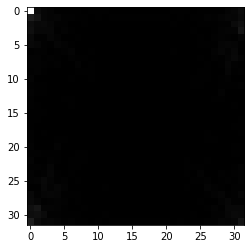

In [5]:
from scipy.fft import fft2, ifft2
F = fft2(top_left)
F_abs = [abs(t) for t in F]
plt.imshow(F_abs, cmap="gray")



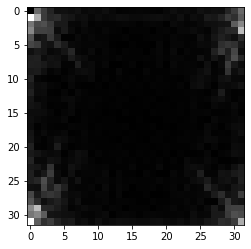

In [6]:
F[0][0] = 0
F_abs = [abs(t) for t in F]
plt.imshow(F_abs, cmap="gray")

In [62]:

def max_val_abs(f):
    max_val = abs(f[0][0])
    for k in range(32):
        for l in range(32):
            if abs(f[k][l]) > max_val:
                max_val = abs(f[k][l])
    return max_val

def Compress(X, tol):
    nonzero = 0
    dropped = 0
    Y = np.empty(X.shape)
    for m in range(0, len(X), 32):
        for n in range(0, len(X), 32):
            block = X[m:m+32, n:n+32]
            F = fft2(block)
            
            F_max = max_val_abs(F)
            for k in range(32):
                for l in range(32):
                    if abs(F[k][l]) < F_max*tol and abs(F[k][l]) > 0:
                        F[k][l] = 0
                        nonzero += 1
                        dropped += 1
                    elif abs(F[k][l]) > 0:
                        nonzero += 1
            new_block = F
            for k in range(32):
                for l in range(32):
                    if abs(F[k][l]) == 0:
                        new_block[k][l] = 0
            new_block = ifft2(new_block)
            Y[m:m+32, n:n+32] = new_block
    drop = dropped/nonzero
    return (Y, drop)


/var/folders/zr/bxgx5cnd5cj1cn9np0zns8c00000gn/T/ipykernel_40539/4087190352.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[m:m+32, n:n+32] = new_block


Text(0.5, 1.0, 'Tol = 0.02 and drop = 0.97')

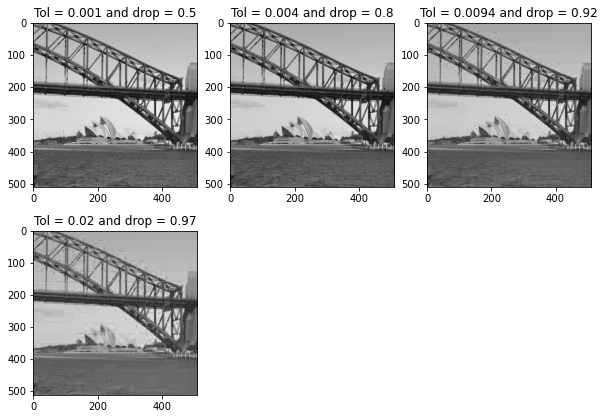

In [56]:
fig = plt.figure(figsize=(10, 7))

Y1, drop1 = Compress(f, 0.001)

fig.add_subplot(2,3,1)
plt.imshow(Y1, cmap="gray")
plt.title(f'''Tol = 0.001 and drop = 0.5''')

Y2, drop2 = Compress(f, 0.004)

fig.add_subplot(2,3,2)
plt.imshow(Y2, cmap="gray")
plt.title(f'''Tol = 0.004 and drop = 0.8''')

Y3, drop3 = Compress(f, 0.0094)

fig.add_subplot(2,3,3)
plt.imshow(Y3, cmap="gray")
plt.title(f'''Tol = 0.0094 and drop = 0.92''')

Y4, drop4 = Compress(f, 0.02)

fig.add_subplot(2,3,4)
plt.imshow(Y4, cmap="gray")
plt.title(f'''Tol = 0.02 and drop = 0.97''')






Text(0.5, 1.0, 'Error Image')

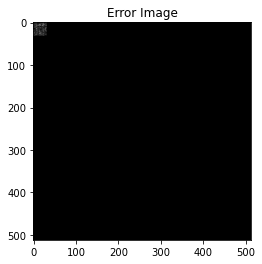

In [61]:
error_img = np.subtract(f, Y1)

abs_error_img = np.empty(error_img.shape)
for i in range(32):
    for j in range(32):
        abs_error_img[i][j] = abs(error_img[i][j])
        
plt.imshow(abs_error_img, cmap="gray")
plt.title("Error Image")